In [74]:
import gzip
import os
import re
import time
from curses.ascii import isdigit

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import MultipleLocator

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "Times New Roman",
    "font.size": 18,
    "mathtext.fontset": "stix",
})


In [75]:
def plot_line_chart(data, pic_name='txrate', save=True, xlabel="TX rate / (TXs/Sec)", ylabel="Throughput (tps)", text_location=50, ylim=2800, labellist=['bsize=100', 'bsize=150', 'bsize=80', 'bsize=50'], ytick_k=False, xlim=1000000, xscale=5, colorlist=['orange', 'red', 'grey', 'black', 'blue', 'green', 'yellow'], markerlist=['o', '^', 'x', 's', 'v', '1', 'v'], ystep=5000, xstep=500, linewidth=2, legend=True, xlimD=0, ylimD=0, lengendFontSize=12,ticksize=18):
    x = data[0, :]
    ynum = np.size(data, 0)-1
    y = data[1:ynum+1, :]
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    for i in range(ynum):
        if legend:
            leftaxis.plot(x, y[i, :], label=labellist[i], zorder=2,
                          linewidth=linewidth, marker=markerlist[i], markersize=6)
        else:
            leftaxis.plot(x, y[i, :], zorder=2, linewidth=linewidth,
                          marker=markerlist[i], markersize=6)
        # leftaxis.plot(x, y[i,:])

    leftaxis.grid(axis='y', linestyle='--', zorder=0)
    leftaxis.grid(axis='x', linestyle='--', zorder=0)

    innerXstep = (xlim - xlimD)/20

    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_xlim(xlimD-innerXstep, xlim+innerXstep)
    leftaxis.set_ylim(ylimD-1, ylim+1)
    leftaxis.set_xticks(np.arange(xlimD, xlim+innerXstep, xstep))
    leftaxis.xaxis.set_tick_params(labelsize=ticksize)
    leftaxis.set_yticks(np.arange(ylimD, ylim+1, ystep))
    leftaxis.yaxis.set_tick_params(labelsize=ticksize)
    if legend:
        plt.rc('legend', fontsize=lengendFontSize)
        lg = leftaxis.legend(bbox_to_anchor=(1.0, 1.2),
                             ncol=4, fancybox=True, shadow=True)
    # set(lg,'font')

    if save:
        # plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()
        #                                  )+"_Figure_"+pic_name+".png", dpi=600, bbox_inches='tight')
        plt.savefig("pic/"+pic_name+".png", dpi=600, bbox_inches='tight')
    plt.show()
    return fig

# plot_line_chart(data=q1data,pic_name='q1',save=True,xlabel="Time (sec)", ylabel="Queue Size (TX)",text_location=12,xlim=2100, ylim=q1data.max()*1.1,labellist=['8 shards','16 shards','24 shards','32 shards','40 shards','48 shards','56 shards'],ystep=15000,xstep=300)


In [76]:
# fMeasure is the function to caluculate the F1 score from the precision and recall
def fMeasure(precision, recall):
    return 2 * precision * recall / (precision + recall)

In [77]:
# fMeasureArray is the function to caluculate the F1 score from the precision and recall array
# def fMeasureArray(precision, recall):
#     return 2 * precision * recall / (precision + recall)
def fMeasureArray(y_pre, y_recall):
    resultarray = np.zeros([np.size(y_pre, 0), np.size(y_pre, 1)])
    for i in range(np.size(y_pre, 0)):
        for j in range(np.size(y_pre, 1)):
            resultarray[i, j] = fMeasure(y_pre[i, j], y_recall[i, j])
    return resultarray

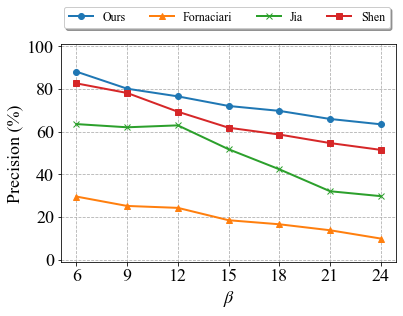

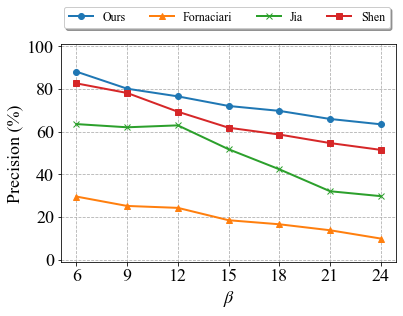

In [78]:
# x is the x axis for plotting from 6 to 24 with step 3
x_beta = np.arange(6, 25, 3)
# y is the data for plotting
# y[0] is the data for our method
# y[1] is the data for Fornaciari's method
# y[2] is the data for Jia's method
# y[3] is the data for Shen's method
y_pre = np.array([[88.2, 80.2, 76.6, 72.1, 69.8, 66.0, 63.5],
              [29.6, 25.2, 24.3, 18.5, 16.6, 13.8, 9.9],
              [63.6, 62.1, 63.0, 51.8, 42.4, 32.1, 29.8],
              [82.7, 78.2, 69.4, 61.9, 58.7, 54.7, 51.5]])
# data is the combination of x and y
data_pre_beta = np.vstack((x_beta, y_pre))
# print(data_pre_beta)
plot_line_chart(data=data_pre_beta, pic_name='Precision_beta', save=True, xlabel="$\\beta$", ylabel="Precision (%)", text_location=12, xlim=24, ylim=100,
                labellist=['Ours', 'Fornaciari', 'Jia', 'Shen'],
                ystep=20, xstep=3, xlimD=6, ylimD=0)


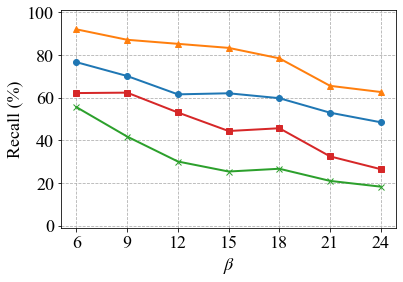

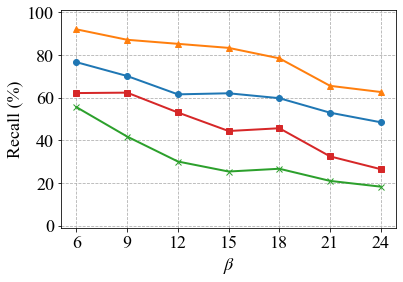

In [79]:
# x is the x axis for plotting from 6 to 24 with step 3
x_beta = np.arange(6, 25, 3)
# y is the data for plotting
# y[0] is the data for our method
# y[1] is the data for Fornaciari's method
# y[2] is the data for Jia's method
# y[3] is the data for Shen's method
y_recall = np.array([[76.7, 70.2, 61.6, 62.1, 59.8, 53.0, 48.5],
                  [92.1, 87.2, 85.3, 83.4, 78.5, 65.6, 62.7],
                  [55.6, 41.8, 30.1, 25.4, 26.7, 21.0, 18.3],
                  [62.2, 62.4, 53.1, 44.4, 45.7, 32.5, 26.5]])
# data is the combination of x and y
data_recall_beta = np.vstack((x_beta, y_recall))
# print(data_pre_beta)
plot_line_chart(data=data_recall_beta, pic_name='Recall_beta', save=True, xlabel="$\\beta$", ylabel="Recall (%)", text_location=12, xlim=24, ylim=100,
                labellist=['Ours', 'Fornaciari', 'Jia', 'Shen'],
                ystep=20, xstep=3, xlimD=6, ylimD=0, legend=False)


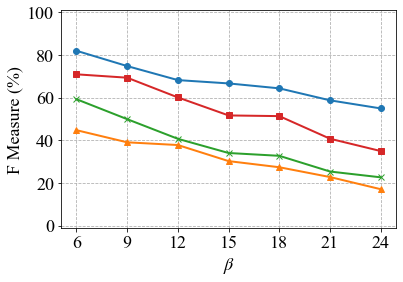

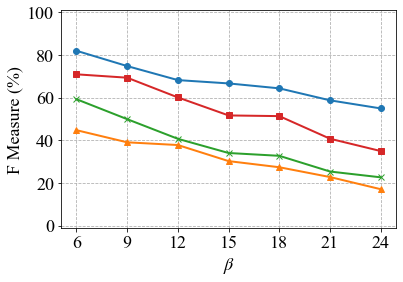

In [80]:
# print(np.size(y_pre,1))
# print(y_pre[1])
y_fMeasure = fMeasureArray(y_pre, y_recall)
data_fMeasure_beta = np.vstack((x_beta, y_fMeasure))
plot_line_chart(data=data_fMeasure_beta, pic_name='F1_beta', save=True, xlabel="$\\beta$", ylabel="F Measure (%)", text_location=12, xlim=24, ylim=100,
                labellist=['Ours', 'Fornaciari', 'Jia', 'Shen'],
                ystep=20, xstep=3, xlimD=6, ylimD=0, legend=False)


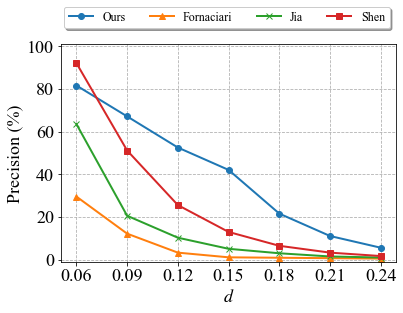

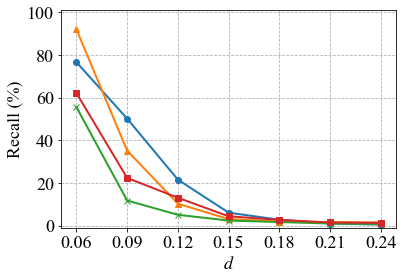

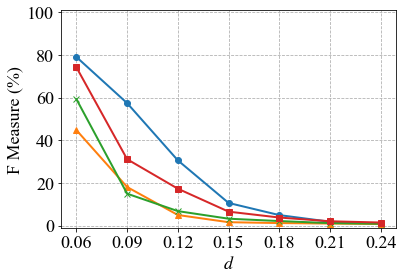

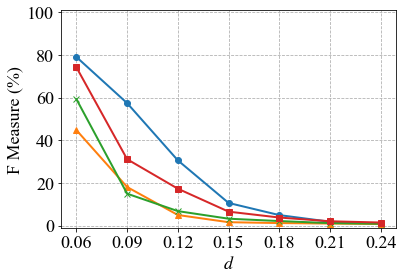

In [81]:
# x_d is the x axis for plotting from 0.06 to 0.24 with step 0.03
x_d = np.arange(0.06, 0.25, 0.03)
# y_pre_d is the data for plotting
# y_pre_d[0] is the data for our method
# y_pre_d[1] is the data for Fornaciari's method
# y_pre_d[2] is the data for Jia's method
# y_pre_d[3] is the data for Shen's method
y_pre_d = np.array([[81.7, 67.2, 52.6, 42.1, 21.6, 11.1, 5.6],
                    [29.6, 12.2, 3.3, 1.1, 0.9, 0.7, 0.5],
                    [63.6, 20.6, 10.3, 5.1, 3.0, 1.5, 1.0],
                    [92.2, 51.2, 25.6, 13.0, 6.5, 3.3, 1.7]])
# data is the combination of x and y
data_pre_d = np.vstack((x_d, y_pre_d))
y_recall_d = np.array([[76.7, 50.2, 21.6, 6.1, 2.8, 1.0, 0.5],
                       [92.1, 35.2, 10.3, 3.1, 1.9, 1.7, 1.5],
                       [55.6, 11.8, 5.1, 2.4, 1.7, 1.0, 0.8],
                       [62.2, 22.4, 13.1, 4.4, 2.7, 1.5, 1.3]])
data_recall_d = np.vstack((x_d, y_recall_d))
y_fMeasure_d = fMeasureArray(y_pre_d, y_recall_d)
data_fMeasure_d = np.vstack((x_d, y_fMeasure_d))
plot_line_chart(data=data_pre_d, pic_name='Precision_d', save=True, xlabel="$d$", ylabel="Precision (%)", text_location=12, xlim=0.24, ylim=100,
                labellist=['Ours', 'Fornaciari', 'Jia', 'Shen'],
                ystep=20, xstep=0.03, xlimD=0.06, ylimD=0)
plot_line_chart(data=data_recall_d, pic_name='Recall_d', save=True, xlabel="$d$", ylabel="Recall (%)", text_location=12, xlim=0.24, ylim=100,
                labellist=['Ours', 'Fornaciari', 'Jia', 'Shen'],
                ystep=20, xstep=0.03, xlimD=0.06, ylimD=0, legend=False)
plot_line_chart(data=data_fMeasure_d, pic_name='F1_d', save=True, xlabel="$d$", ylabel="F Measure (%)", text_location=12, xlim=0.24, ylim=100,
                labellist=['Ours', 'Fornaciari', 'Jia', 'Shen'],
                ystep=20, xstep=0.03, xlimD=0.06, ylimD=0, legend=False)




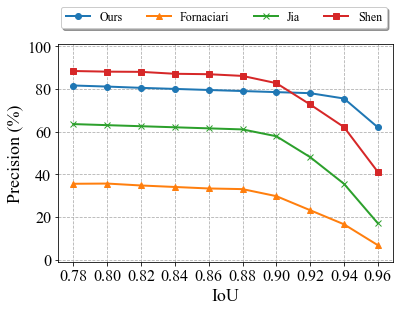

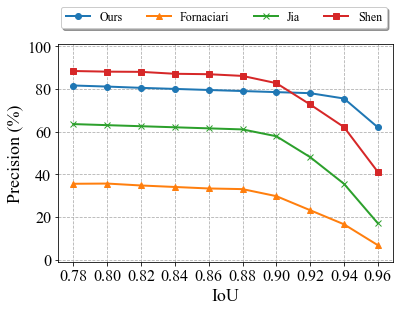

In [82]:
x_iou = np.arange(0.78, 0.97, 0.02)
y_pre_iou = np.array([[81.7, 81.2, 80.6, 80.1, 79.6, 79.1, 78.6, 78.1, 75.6, 62.1],
                        [35.6, 35.7, 34.8, 34.1, 33.4, 33.1, 29.8, 23.2, 16.6, 6.8],
                        [63.6, 63.1, 62.6, 62.1, 61.6, 61.1, 57.9, 48.1, 35.6, 17.1],
                      [88.5, 88.2, 88.1, 87.2, 87.0, 86.2, 82.8, 72.8, 62.2, 41.2]])

data_pre_iou = np.vstack((x_iou, y_pre_iou))
plot_line_chart(data=data_pre_iou, pic_name='Precision_iou', save=True, xlabel="IoU", ylabel="Precision (%)", text_location=12, xlim=0.96, ylim=100,
                labellist=['Ours', 'Fornaciari', 'Jia', 'Shen'],
                ystep=20, xstep=0.02, xlimD=0.78, ylimD=0, ticksize=16)


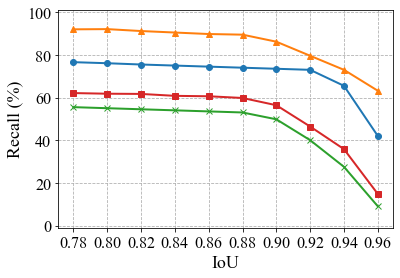

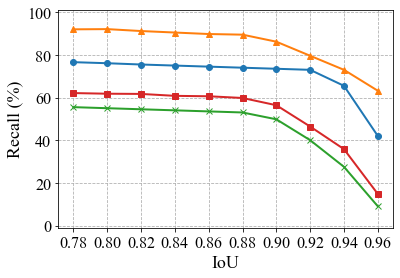

In [83]:
y_recall_iou = np.array([[76.7, 76.2, 75.6, 75.1, 74.6, 74.1, 73.6, 73.1, 65.6, 42.1],
                        [92.1, 92.2, 91.3, 90.6, 89.9, 89.6, 86.3, 79.7, 73.1, 63.3],
                        [55.6, 55.1, 54.6, 54.1, 53.6, 53.1, 49.9, 40.1, 27.6, 9.1],
                        [62.2, 61.9, 61.8, 60.9, 60.7, 59.9, 56.5, 46.5, 35.9, 14.9]])

data_recall_iou = np.vstack((x_iou, y_recall_iou))
plot_line_chart(data=data_recall_iou, pic_name='Recall_iou', save=True, xlabel="IoU", ylabel="Recall (%)", text_location=12, xlim=0.96, ylim=100,
                labellist=['Ours', 'Fornaciari', 'Jia', 'Shen'],
                ystep=20, xstep=0.02, xlimD=0.78, ylimD=0, legend=False, ticksize=16)


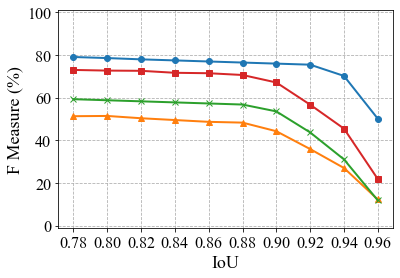

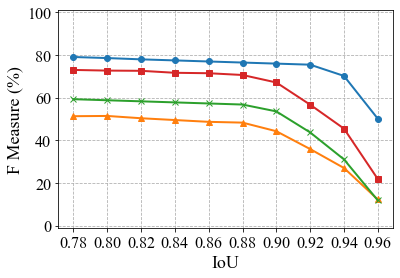

In [84]:
y_fMeasure_iou = fMeasureArray(y_pre_iou, y_recall_iou)
data_fMeasure_iou = np.vstack((x_iou, y_fMeasure_iou))
plot_line_chart(data=data_fMeasure_iou, pic_name='F1_iou', save=True, xlabel="IoU", ylabel="F Measure (%)", text_location=12, xlim=0.96, ylim=100,
                labellist=['Ours', 'Fornaciari', 'Jia', 'Shen'],
                ystep=20, xstep=0.02, xlimD=0.78, ylimD=0, legend=False, ticksize=16)